# Tesseroid Forward Calculation with Variable Density

## One Tesseroid

We are going to try a simple forward calculation using one Tesseroid with linear variable density in height.

/usr/local/lib/python2.7/dist-packages/fatiando/vis/myv.py:53: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")



Show model? (Enter for OK): no


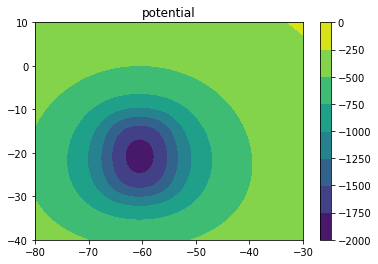

Time it took: 0.104115962982


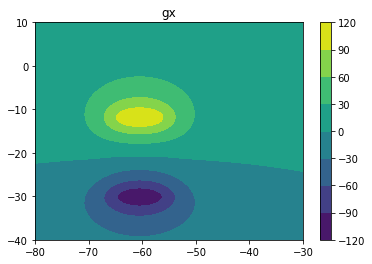

Time it took: 0.238200902939


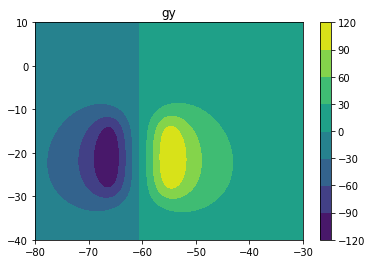

Time it took: 0.228128910065


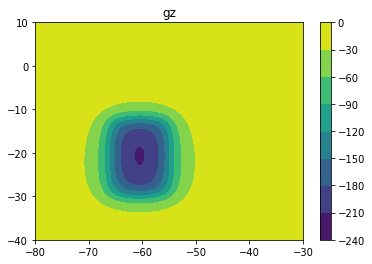

Time it took: 0.226877212524


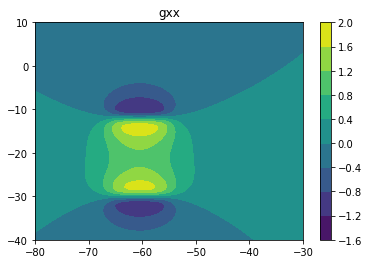

Time it took: 6.64847898483


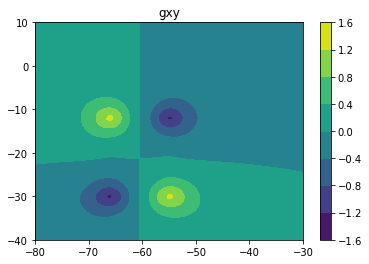

Time it took: 6.6210000515


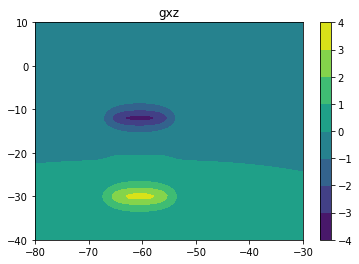

Time it took: 6.41255998611


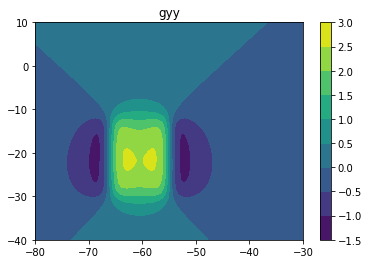

Time it took: 6.48541784286


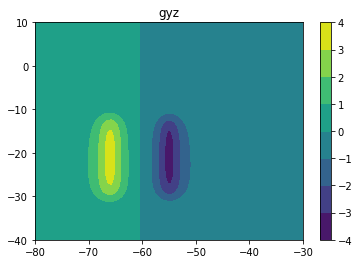

Time it took: 6.39799499512


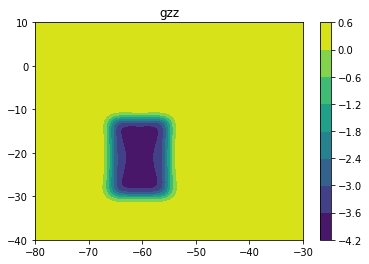

Time it took: 6.92136311531


In [1]:
import time
import numpy as np
from fatiando import gridder, utils
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid
from fatiando.vis import myv
import matplotlib.pyplot as plt


def density(lon, lat, height):
   return 2e-3*height - 100


model = [Tesseroid(-66, -55, -30, -12, 0, -50000, props={'density': density})]

# Show the model before calculating
answer = raw_input("\nShow model? (Enter for OK): ")
if answer == "":
   scene = myv.figure(zdown=False)
   myv.tesseroids(model, 'density')
   myv.continents(linewidth=2)
   myv.earth(opacity=0.8)
   myv.meridians(range(0, 360, 45), opacity=0.2)
   myv.parallels(range(-90, 90, 45), opacity=0.2)
   scene.scene.camera.position = [23175275.131412581, -16937347.013663091,
                                  -4924328.2822419703]
   scene.scene.camera.focal_point = [0.0, 0.0, 0.0]
   scene.scene.camera.view_angle = 30.0
   scene.scene.camera.view_up = [0.083030001958377356, -0.17178720527713925,
                                 0.98162883763562181]
   scene.scene.camera.clipping_range = [9229054.5133903362, 54238225.321054712]
   scene.scene.camera.compute_view_plane_normal()
   scene.scene.render()
   myv.show()

# Create the computation grid
area = (-80, -30, -40, 10)
shape = (100, 100)
lons, lats, heights = gridder.regular(area, shape, z=250000)

fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()
for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    plt.contourf(lons.reshape(shape), lats.reshape(shape), result.reshape(shape))
    plt.colorbar()
    plt.title(f)
    plt.show()
    print "Time it took: %s" % (end - start)


## Tesseroid Mesh

Meshes of Tesseroid can be passed with variable densities, and Tesseroid with constant densities can be mixed with the ones that have variable densities.


Show model? (Enter for OK): no


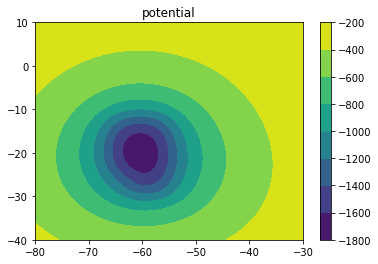

Time it took: 0.746181964874


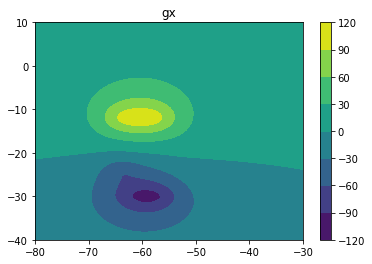

Time it took: 1.26983380318


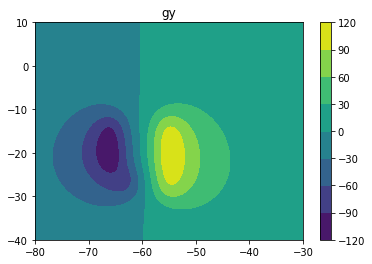

Time it took: 1.22867012024


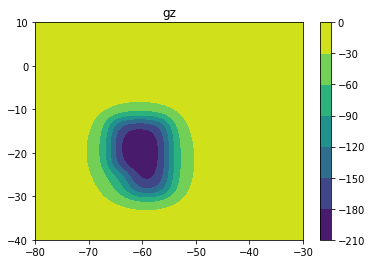

Time it took: 1.19798111916


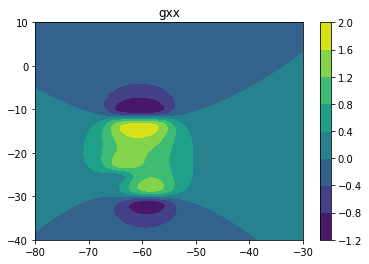

Time it took: 15.624363184


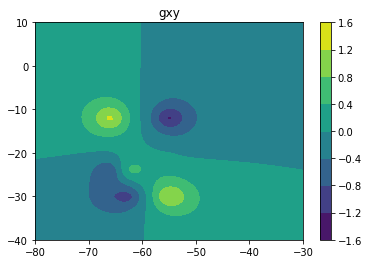

Time it took: 15.7150230408


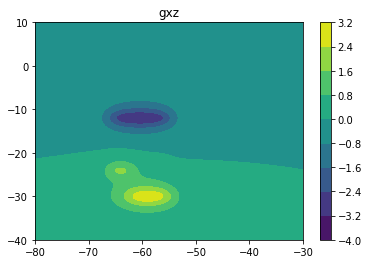

Time it took: 15.5639340878


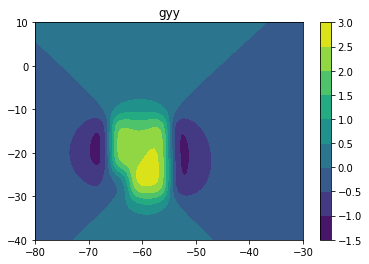

Time it took: 15.4806909561


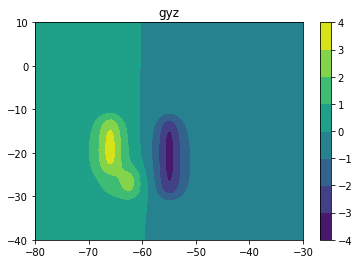

Time it took: 15.2016441822


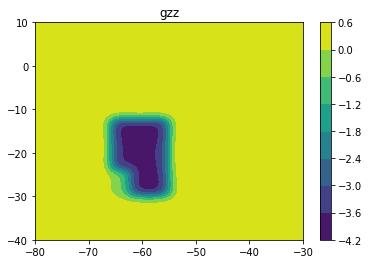

Time it took: 16.8769590855


In [3]:
import time
import numpy as np
from fatiando import gridder, utils
from tesseroid_density import tesseroid
from fatiando.mesher import TesseroidMesh
from fatiando.vis import myv
import matplotlib.pyplot as plt


def density(lon, lat, height):
   return 2e-3*height - 100

shape = (3, 3, 3)
size = shape[0]*shape[1]*shape[2]

density_list = [density for i in range(size)]
density_list[0] = 200

model = TesseroidMesh((-66, -55, -30, -12, 0, -50000), shape,
                      props={'density': density_list})

# Show the model before calculating
answer = raw_input("\nShow model? (Enter for OK): ")
if answer == "":
   scene = myv.figure(zdown=False)
   myv.tesseroids(model, 'density')
   myv.continents(linewidth=2)
   myv.earth(opacity=0.8)
   myv.meridians(range(0, 360, 45), opacity=0.2)
   myv.parallels(range(-90, 90, 45), opacity=0.2)
   scene.scene.camera.position = [23175275.131412581, -16937347.013663091,
                                  -4924328.2822419703]
   scene.scene.camera.focal_point = [0.0, 0.0, 0.0]
   scene.scene.camera.view_angle = 30.0
   scene.scene.camera.view_up = [0.083030001958377356, -0.17178720527713925,
                                 0.98162883763562181]
   scene.scene.camera.clipping_range = [9229054.5133903362, 54238225.321054712]
   scene.scene.camera.compute_view_plane_normal()
   scene.scene.render()
   myv.show()

# Create the computation grid
area = (-80, -30, -40, 10)
shape = (100, 100)
lons, lats, heights = gridder.regular(area, shape, z=250000)

fields = "potential gx gy gz gxx gxy gxz gyy gyz gzz".split()
for f in fields:
    start = time.time()
    result = getattr(tesseroid, f)(lons, lats, heights, model)
    end = time.time()

    plt.contourf(lons.reshape(shape), lats.reshape(shape), result.reshape(shape))
    plt.colorbar()
    plt.title(f)
    plt.show()
    print "Time it took: %s" % (end - start)
